**지도학습의 대표적인 유형인 분류는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정값, 클래스 값)을 머신러닝 알고리즘으로 학습해
 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다.**

 - 분류 : 나이브 베이즈, 로지스틱 회귀, 결정 트리, 서포트 벡터 머신, 최소 근접 알고리즘, 신경망, 앙상블
 - 앙상블 : 일반적으로는 배깅과 부스팅방식으로 나뉜다.

**배깅 방식의 대표인 랜덤 포레스트는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘이다.**
 - 부스팅의 효시라고 할 수 있는 그래디언트 부스팅의 경우 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 최적화
 - 튜닝이 어려워졌지만 XgBoost와 LightGBM 등 수행 시간을 단축시킨 알고리즘이 계속 등장하기 시작했다.

**결정트리는 ML알고리즘 중 직관적으로 이해하기 쉬운 알고리즘이다.**
 - 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것이다.
 - 결정 트리의 구조 중 규칙 노드로 표시된 노드는 규칙 조건이 되는 것이고, 리프 노드로 표시된 노드는 결정된 클래스 값이다.
 - 그리고 새로운 규칙 조건마다 서브 트리가 생성된다.
 - 하지만 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 뜻이고 이는 곧 과적합을 이어지기 쉽다.
 - 즉, 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test , y_train, y_test = train_test_split(iris_data.data , iris_data.target, test_size = 0.2, random_state=11)

#DecisionTreeClassifier 학습.
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file = "tree.dot",class_names=iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity = True, filled=True)

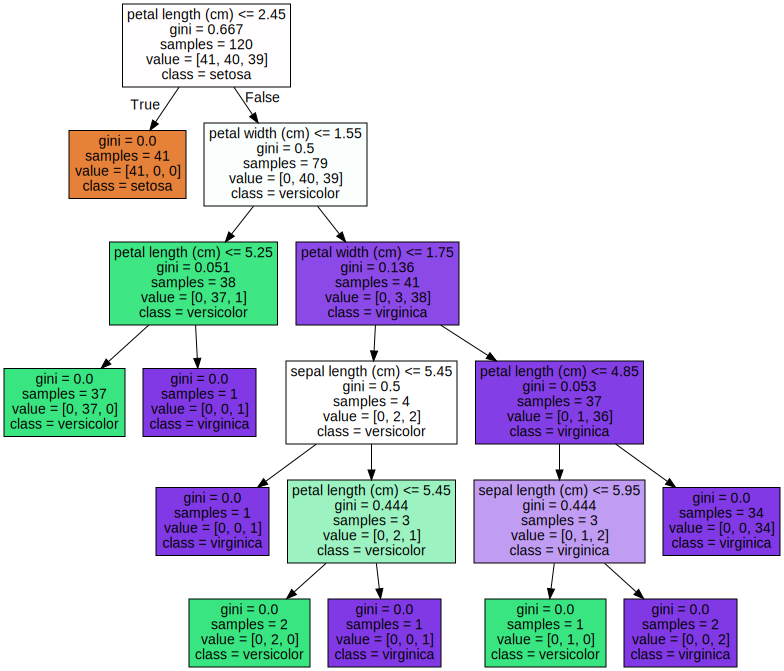

In [3]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 먼저 더 이상 자식 노드가 없는 노드는 리프 노드이다.
# 자식 노드가 있는 노드는 브랜치 노드이며 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있다.

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

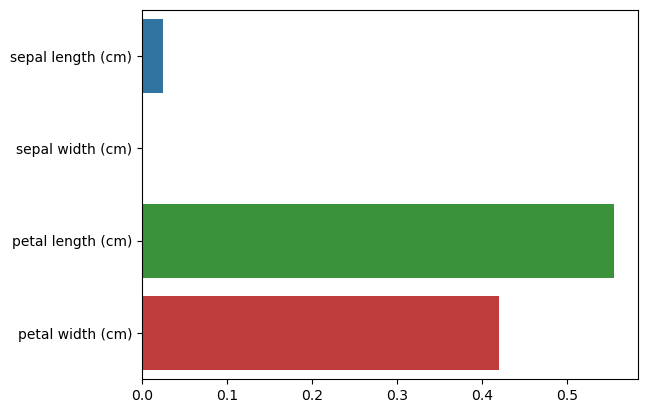

In [4]:
# feature_importances_는 ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당된다.
# 값이 높을수록 해당 피처의 중요도가 높다
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    
# feature importance를 column 별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

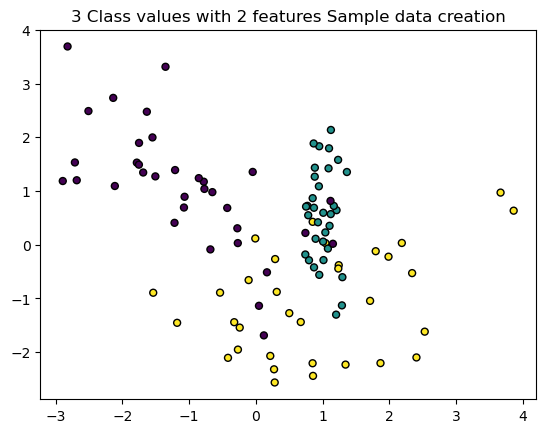

In [5]:
# 결정트리 과적합
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant =0, n_informative=2, n_classes=3, n_clusters_per_class=1,random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker ='o', c = y_labels, s=25, edgecolor = 'k')

In [6]:
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이터 scatter plot
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training data 로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),\
                         np.linspace(ylim_start, ylim_end, num=200))
    # np.c_ : np.column_stack,np.concatenate 와 같은의미
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf()를 이용 class boundary visualization 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)



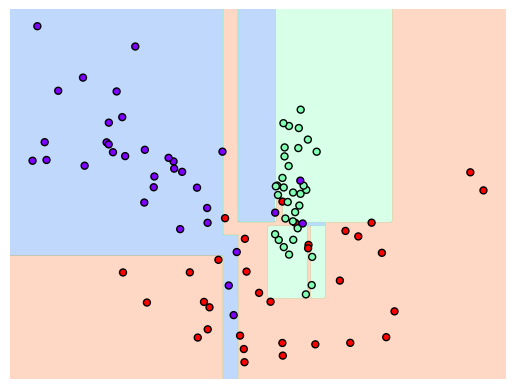

In [7]:
# 일부 이상치(Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌다.
# 이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 된다.
from sklearn.tree import DecisionTreeClassifier 

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
df_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

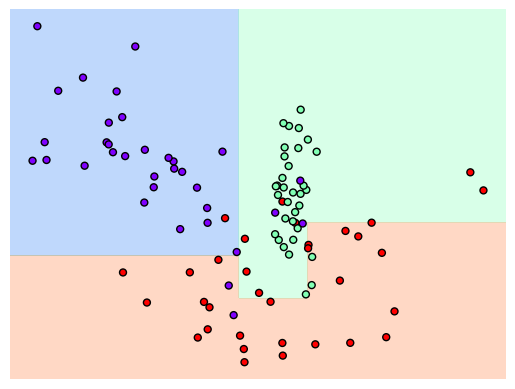

In [8]:
# 학습 데이터에만 지나치게 최적화된 분류기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있다.
#min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features, y_labels)

**결정 트리 실습 - 사용자 행동 인식 데이터 세트**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DateFrame으로 로드
feature_name_df = pd.read_csv('features.txt',sep='\s+',header=None, names = ['column_index','column_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [10]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [11]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0] + '_'+str(x[1])
                                                                                           if x[1] > 0 else x[0] , axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df       

In [12]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('features.txt',sep='\s+',header=None, names = ['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DateFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체에 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./train/X_train.txt', sep = '\s+', names= feature_name)
    X_test = pd.read_csv('./test/X_test.txt', sep = '\s+', names= feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./train/y_train.txt', sep = '\s+', header=None, names= ['action'])
    y_test = pd.read_csv('./test/y_test.txt', sep = '\s+', header=None, names= ['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [13]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [14]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state =156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [16]:
# 결정 트리의 트리 깊이가 예측 정확도에 주는 영향.
# 결정 트리의 경우 분류를 위해 리프 노드가 될 수 있는 적합한 수준이 될 때까지 지속해서 트리의 분할을 수행하면서 깊이가 깊어진다.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv =5, verbose =1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [17]:
#GridSearchCV 객체의 cv_results_, 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [18]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths :
    dt_clf = DecisionTreeClassifier(max_depth =depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [19]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv =5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [20]:
best_df_clf =grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도;{0:.4f}'.format(accuracy))

결정 트리 예측 정확도;0.8717


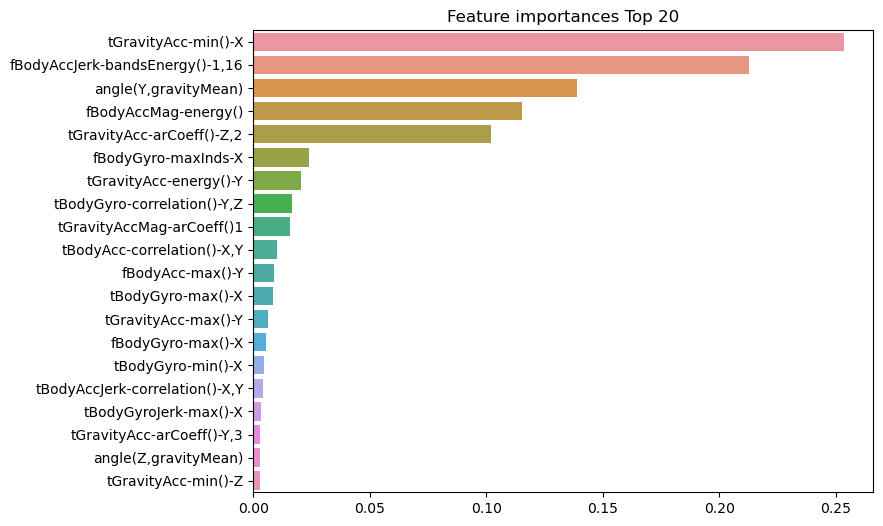

In [21]:
# 막대 그래프상에서 확인해 보면 이 중 가장 높은 중요도를 가진 Top 5의 피처들이 매우 중요하게 규칙 생성에 영향을 미치고 있다.
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

**앙상블 학습**
 - 앙상블 학습의 유형은 전통적으로 보팅, 배깅, 부스팅의 세 가지로 나눌 수 있으며, 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.
 - 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 
 - 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것
 - 대표적인 배깅 방식이 랜덤 포레스트 알고리즘이다.

**보팅 유형 - 하드 보팅과 소프트 보팅**
 - 하드 보팅을 이용한 분류는 다수결 원칙과 비슷하다. 예측한 결괏값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
 - 소프트 보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괎값으로 선정
 - 일반적으로 하드 보팅보다는 소프트 보팅이 예측 성능이 좋아서 더 많이 사용된다.

In [22]:
# 보팅 분류기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [23]:
#개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

#개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도:{1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도:0.9474
LogisticRegression 정확도:0.9386
KNeighborsClassifier 정확도:0.9386


**랜덤 포레스트**
 - 비교적 빠른 수행 속도, 다양한 영역에서 높은 예측 성능
 - 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑 분할 방식이라고 한다.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0] + '_'+str(x[1])
                                                                                           if x[1] > 0 else x[0] , axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df       

def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('features.txt',sep='\s+',header=None, names = ['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DateFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체에 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./train/X_train.txt', sep = '\s+', names= feature_name)
    X_test = pd.read_csv('./test/X_test.txt', sep = '\s+', names= feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./train/y_train.txt', sep = '\s+', header=None, names= ['action'])
    y_test = pd.read_csv('./test/y_test.txt', sep = '\s+', header=None, names= ['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능평가
rf_clf =RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [25]:
# 랜덤 포레스트 하이퍼 파라미터 및 튜닝
# n_jobs = -1 파라미터를 추가하면 모든 CPU 코어를 이용해 학습할 수 있다.
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}
#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9180


In [26]:
rf_clf1 = RandomForestClassifier(n_estimators =300, max_depth=10, min_samples_leaf=8,min_samples_split=8,random_state=0)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9165


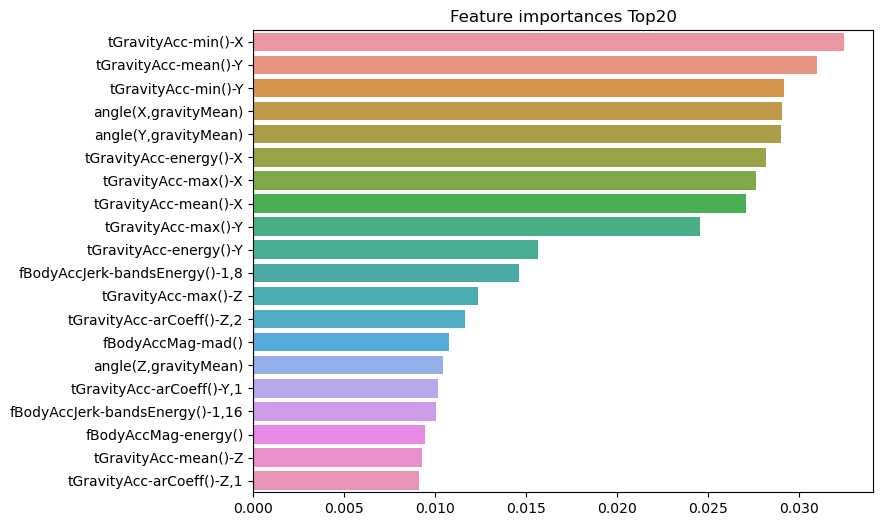

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

**GBM**
 - 부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습
 - AdaBoost, 그래디언트 부스트
 - 랜덤포레스트보다 예측 성능이 뛰어난 경우가 많다. 하지만 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요하다.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f}초".format(time.time() - start_time))

GBM 정확도 : 0.9389
GBM 수행 시간: 1156.9초


In [30]:
# 꽤 오래 걸림 1시간 이상
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv=2, verbose=1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9002


In [31]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9393


**XGBoost**
 - 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나이다.
 - 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타낸다. 
 - GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결해서 매우 각광을 받고 있다.

In [32]:
# conda install -c anaconda py-xgboost
import xgboost as xgb
from xgboost import XGBClassifier
# conda install -c conda -forge xgboost

In [33]:
import xgboost
print(xgboost.__version__)

1.7.3


In [34]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [35]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [36]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state =156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [37]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label = y_test)

In [38]:
params = { 'max_depth':3,
           'eta' : 0.1,
           'objective': 'binary:logistic',
           'eval_metric':'logloss',
           'early_stoppings' : 100
         }
num_rounds = 400

In [39]:
# train 데이터 세트는 'train',evaluation(test) 데이터 세트는 'eval'로 명기합니다.
wlist = [(dtrain, 'train'),(dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds, early_stopping_rounds = 100,evals = wlist)

[18:51:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.181

[167]	train-logloss:0.00714	eval-logloss:0.08764
[168]	train-logloss:0.00712	eval-logloss:0.08739
[169]	train-logloss:0.00710	eval-logloss:0.08738
[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08695
[177]	train-logloss:0.00695	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:0.00687	eval-logloss:0.08683
[183]	train-logloss:0.00685	eval-logloss:0.08658
[184]	train-logloss:0.00683	eval-logloss:0.08659
[185]	train-logloss:0.00681	eval-logloss:0.08661
[186]	train-logloss:0.00680	eval-logloss:0.08637
[187]	train-logloss:

In [40]:
pred_probs = xgb_model.predict(dtest)
print('predict()수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict()수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [41]:
# 3장꺼 가져오기
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC - AUC 추가
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC :{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율: 0.9870, F1:0.9806, AUC :0.9951


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

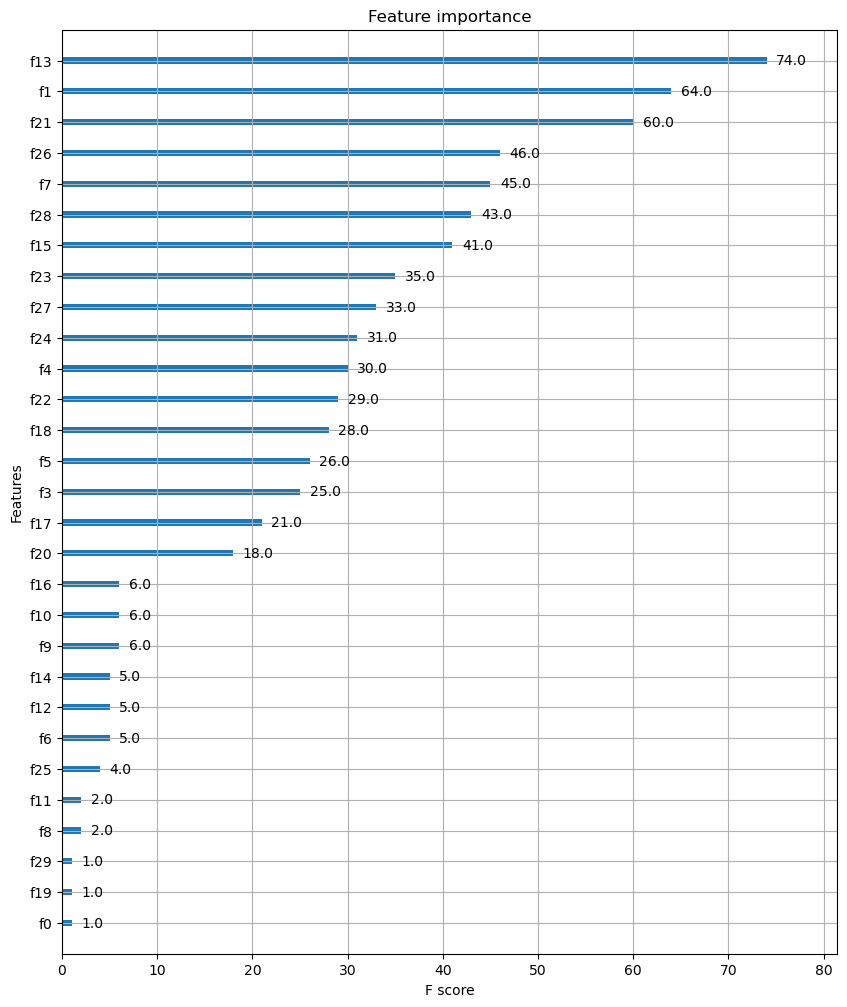

In [42]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [43]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율: 0.9870, F1:0.9806, AUC :0.9951


In [44]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test,y_test)]
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds = 100, eval_metric = "logloss",eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08620
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08645
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [45]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차행렬
[[34  3]
 [ 1 76]]
정확도 : 0.9649, 정밀도 : 0.9620, 재현율: 0.9870, F1:0.9744, AUC :0.9954


In [46]:
# early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10,eval_metric = "logloss",eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

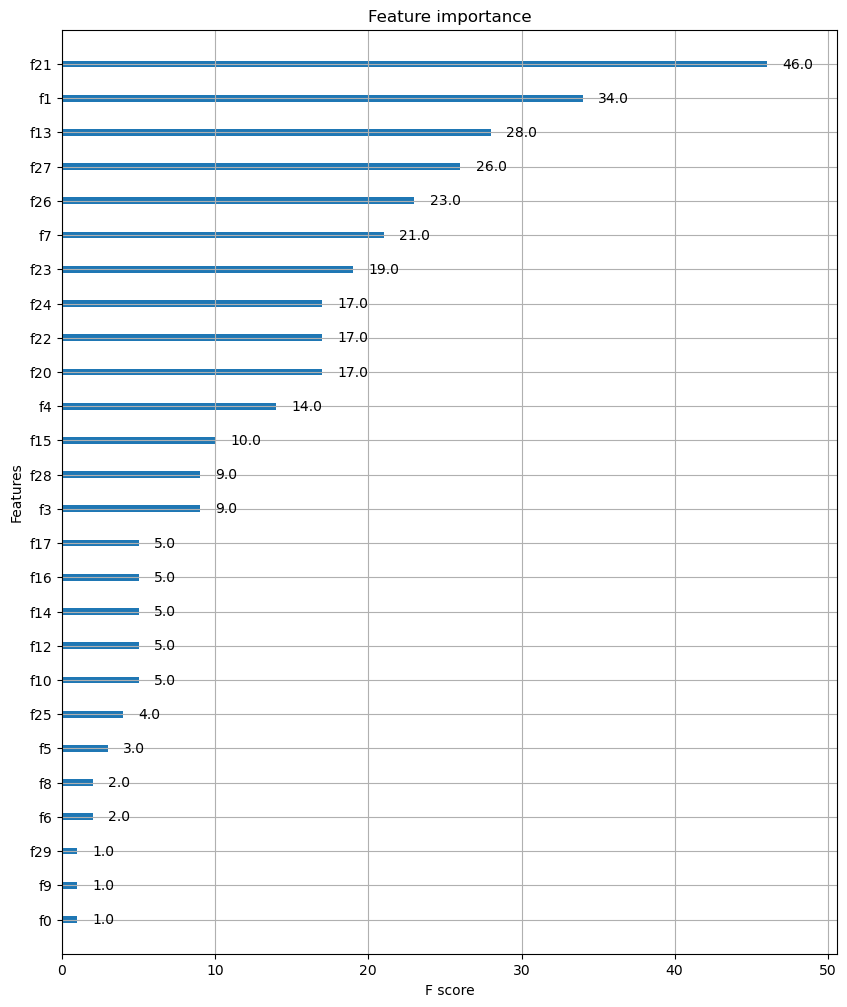

In [47]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
# 사이킷런 Wrapper 클래스를 입력해도 무방.
plot_importance(xgb_wrapper,ax=ax)

***LightGBM - 위스콘신 유방암 예측***
 - XGBoost와 함께 부스팅 계열 알고리즘에서 가장 각광을 받고 있다.
 - XGBoost보다 학습에 걸리는 시간이 훨씬 적다. 또한 메모리 사용량도 상대적으로 적다.
 - 과적합이 발생하기 쉽다
 - 리프 중심 트리 분할 방식. 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 트리의 깊이가 최소화될 수 있다.
 - 하지만 균형을 맞추기 위한 시간이 필요하다.

In [48]:
# conda install -c conda-forge lightgbm

# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

#전체 데이터 중 80%은 학습용 데이터, 20%은 테스트용 데이터 추출
X_train, X_test, y_train , y_test = train_test_split(ftr, target,test_size=0.2,random_state = 156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators = 400)

#LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss",eval_set = evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [49]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[33  4]
 [ 1 76]]
정확도 : 0.9561, 정밀도 : 0.9500, 재현율: 0.9870, F1:0.9682, AUC :0.9905


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

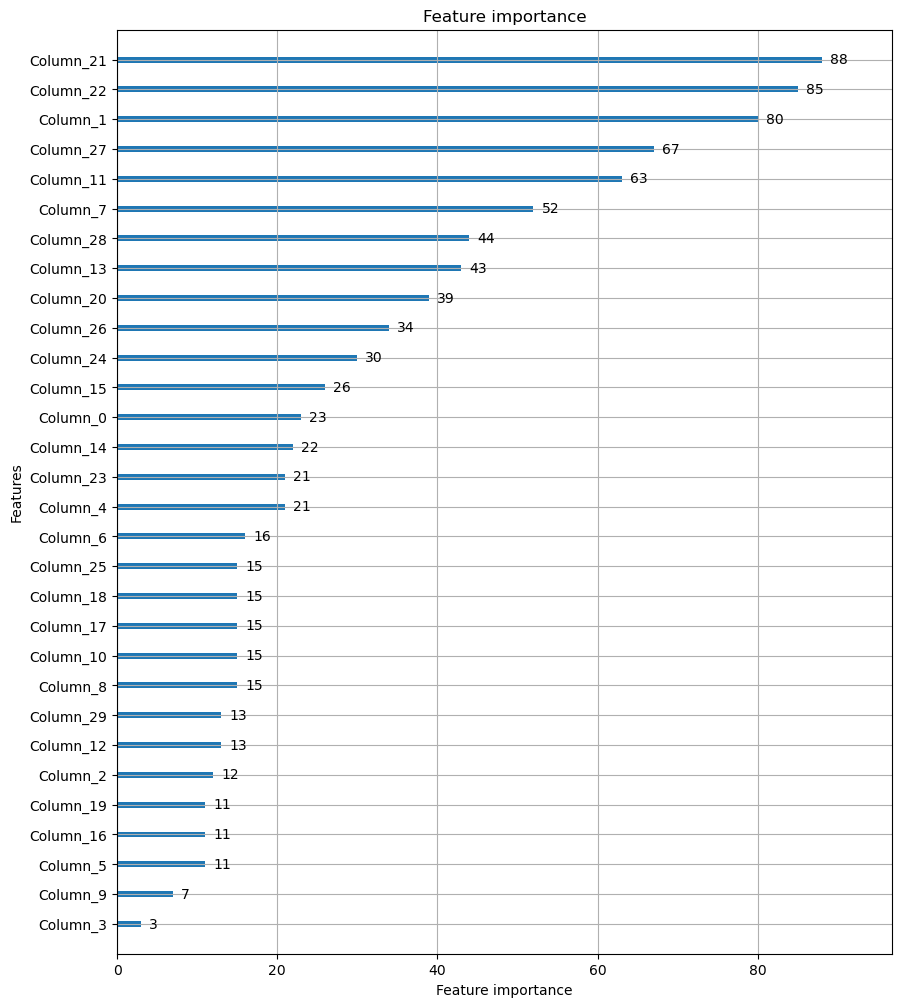

In [50]:
#plot_importance() 를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax =plt.subplots(figsize = (10,12))
plot_importance(lgbm_wrapper, ax=ax)

## 분류 실습 - 캐글 산탄데르 고객 만족 예측

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:',cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [52]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [53]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [54]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [55]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

#피처 세트와 레이블 세트 분리, 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}',format(X_features.shape))

피처 데이터 shape:{0} (76020, 369)


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2,random_state = 0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape : {1}'.format(X_train.shape,X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape : (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

#성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
           eval_metric="auc",eval_set = [(X_train, y_train),(X_test,y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82745
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84055
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88071	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [58]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf =XGBClassifier(n_estimators=100)

params = {'max_depth': [5,7], 'min_child_weight':[1,3],'colsample+bytree':[0.5,0.75]}
#cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",eval_set=[(X_train,y_train),(X_test,y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)
xgb_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

[18:52:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample+bytree" } are not used.

[0]	validation_0-auc:0.80670	validation_1-auc:0.80863
[1]	validation_0-auc:0.82233	validation_1-auc:0.81961
[2]	validation_0-auc:0.82839	validation_1-auc:0.82233
[3]	validation_0-auc:0.83076	validation_1-auc:0.82452
[4]	validation_0-auc:0.83471	validation_1-auc:0.82812
[5]	validation_0-auc:0.83657	validation_1-auc:0.82963
[6]	validation_0-auc:0.84160	validation_1-auc:0.83292
[7]	validation_0-auc:0.84508	validation_1-auc:0.83331
[8]	validation_0-auc:0.84570	validation_1-auc:0.83359
[9]	validation_0-auc:0.84740	validation_1-auc:0.83467
[10]	validation_0-auc:0.85016	validation_1-auc:0.83715
[11]	validation_0-auc:0.85232	validation_1-auc:0.83643
[12]	validation_0-auc:0.85409	validation_1-auc:0.83674
[13]	validation_0-auc:0.85572	validation_1-auc:0.83775
[14]	validation_0-auc:0.85706	validation_1-auc:0.83788
[15]	validation_0-auc:0.85835	valid

[18:52:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample+bytree" } are not used.

[0]	validation_0-auc:0.80800	validation_1-auc:0.80805
[1]	validation_0-auc:0.82289	validation_1-auc:0.82121
[2]	validation_0-auc:0.82855	validation_1-auc:0.82398
[3]	validation_0-auc:0.83053	validation_1-auc:0.82453
[4]	validation_0-auc:0.83247	validation_1-auc:0.82725
[5]	validation_0-auc:0.83744	validation_1-auc:0.82940
[6]	validation_0-auc:0.84206	validation_1-auc:0.83430
[7]	validation_0-auc:0.84356	validation_1-auc:0.83444
[8]	validation_0-auc:0.84531	validation_1-auc:0.83368
[9]	validation_0-auc:0.84686	validation_1-auc:0.83415
[10]	validation_0-auc:0.84813	validation_1-auc:0.83478
[11]	validation_0-auc:0.84977	validation_1-auc:0.83578
[12]	validation_0-auc:0.85199	validation_1-auc:0.83405
[13]	validation_0-auc:0.85348	validation_1-auc:0.83470
[14]	validation_0-auc:0.85514	validation_1-auc:0.83556
[15]	validation_0-auc:0.85540	valid

[18:52:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample+bytree" } are not used.

[0]	validation_0-auc:0.81381	validation_1-auc:0.80871
[1]	validation_0-auc:0.82839	validation_1-auc:0.82297
[2]	validation_0-auc:0.83571	validation_1-auc:0.82491
[3]	validation_0-auc:0.83940	validation_1-auc:0.82517
[4]	validation_0-auc:0.84319	validation_1-auc:0.82762
[5]	validation_0-auc:0.84694	validation_1-auc:0.82860
[6]	validation_0-auc:0.85317	validation_1-auc:0.83144
[7]	validation_0-auc:0.85629	validation_1-auc:0.83300
[8]	validation_0-auc:0.86101	validation_1-auc:0.83416
[9]	validation_0-auc:0.86442	validation_1-auc:0.83459
[10]	validation_0-auc:0.86697	validation_1-auc:0.83670
[11]	validation_0-auc:0.86964	validation_1-auc:0.83574
[12]	validation_0-auc:0.87280	validation_1-auc:0.83445
[13]	validation_0-auc:0.87543	validation_1-auc:0.83370
[14]	validation_0-auc:0.87722	validation_1-auc:0.83324
[15]	validation_0-auc:0.87858	valid

[1]	validation_0-auc:0.82597	validation_1-auc:0.82411
[2]	validation_0-auc:0.83419	validation_1-auc:0.82792
[3]	validation_0-auc:0.83962	validation_1-auc:0.82967
[4]	validation_0-auc:0.84226	validation_1-auc:0.83160
[5]	validation_0-auc:0.84836	validation_1-auc:0.83482
[6]	validation_0-auc:0.85087	validation_1-auc:0.83795
[7]	validation_0-auc:0.85522	validation_1-auc:0.83671
[8]	validation_0-auc:0.85774	validation_1-auc:0.83703
[9]	validation_0-auc:0.85937	validation_1-auc:0.83703
[10]	validation_0-auc:0.86162	validation_1-auc:0.83730
[11]	validation_0-auc:0.86462	validation_1-auc:0.83562
[12]	validation_0-auc:0.86599	validation_1-auc:0.83471
[13]	validation_0-auc:0.86789	validation_1-auc:0.83375
[14]	validation_0-auc:0.87041	validation_1-auc:0.83262
[15]	validation_0-auc:0.87176	validation_1-auc:0.83317
[16]	validation_0-auc:0.87276	validation_1-auc:0.83317
[17]	validation_0-auc:0.87308	validation_1-auc:0.83304
[18]	validation_0-auc:0.87388	validation_1-auc:0.83239
[19]	validation_0-a

[7]	validation_0-auc:0.84508	validation_1-auc:0.83331
[8]	validation_0-auc:0.84570	validation_1-auc:0.83359
[9]	validation_0-auc:0.84740	validation_1-auc:0.83467
[10]	validation_0-auc:0.85016	validation_1-auc:0.83715
[11]	validation_0-auc:0.85232	validation_1-auc:0.83643
[12]	validation_0-auc:0.85409	validation_1-auc:0.83674
[13]	validation_0-auc:0.85572	validation_1-auc:0.83775
[14]	validation_0-auc:0.85706	validation_1-auc:0.83788
[15]	validation_0-auc:0.85835	validation_1-auc:0.83728
[16]	validation_0-auc:0.86000	validation_1-auc:0.83799
[17]	validation_0-auc:0.86192	validation_1-auc:0.83837
[18]	validation_0-auc:0.86278	validation_1-auc:0.83812
[19]	validation_0-auc:0.86344	validation_1-auc:0.83851
[20]	validation_0-auc:0.86473	validation_1-auc:0.83835
[21]	validation_0-auc:0.86540	validation_1-auc:0.83825
[22]	validation_0-auc:0.86583	validation_1-auc:0.83805
[23]	validation_0-auc:0.86607	validation_1-auc:0.83798
[24]	validation_0-auc:0.86683	validation_1-auc:0.83774
[25]	validati

[7]	validation_0-auc:0.84356	validation_1-auc:0.83444
[8]	validation_0-auc:0.84531	validation_1-auc:0.83368
[9]	validation_0-auc:0.84686	validation_1-auc:0.83415
[10]	validation_0-auc:0.84813	validation_1-auc:0.83478
[11]	validation_0-auc:0.84977	validation_1-auc:0.83578
[12]	validation_0-auc:0.85199	validation_1-auc:0.83405
[13]	validation_0-auc:0.85348	validation_1-auc:0.83470
[14]	validation_0-auc:0.85514	validation_1-auc:0.83556
[15]	validation_0-auc:0.85540	validation_1-auc:0.83626
[16]	validation_0-auc:0.85693	validation_1-auc:0.83687
[17]	validation_0-auc:0.85863	validation_1-auc:0.83625
[18]	validation_0-auc:0.85906	validation_1-auc:0.83668
[19]	validation_0-auc:0.86014	validation_1-auc:0.83575
[20]	validation_0-auc:0.86091	validation_1-auc:0.83556
[21]	validation_0-auc:0.86148	validation_1-auc:0.83540
[22]	validation_0-auc:0.86180	validation_1-auc:0.83544
[23]	validation_0-auc:0.86254	validation_1-auc:0.83467
[24]	validation_0-auc:0.86303	validation_1-auc:0.83377
[25]	validati

[8]	validation_0-auc:0.86101	validation_1-auc:0.83416
[9]	validation_0-auc:0.86442	validation_1-auc:0.83459
[10]	validation_0-auc:0.86697	validation_1-auc:0.83670
[11]	validation_0-auc:0.86964	validation_1-auc:0.83574
[12]	validation_0-auc:0.87280	validation_1-auc:0.83445
[13]	validation_0-auc:0.87543	validation_1-auc:0.83370
[14]	validation_0-auc:0.87722	validation_1-auc:0.83324
[15]	validation_0-auc:0.87858	validation_1-auc:0.83335
[16]	validation_0-auc:0.87964	validation_1-auc:0.83355
[17]	validation_0-auc:0.88083	validation_1-auc:0.83347
[18]	validation_0-auc:0.88248	validation_1-auc:0.83332
[19]	validation_0-auc:0.88326	validation_1-auc:0.83380
[20]	validation_0-auc:0.88328	validation_1-auc:0.83387
[21]	validation_0-auc:0.88364	validation_1-auc:0.83431
[22]	validation_0-auc:0.88467	validation_1-auc:0.83430
[23]	validation_0-auc:0.88487	validation_1-auc:0.83417
[24]	validation_0-auc:0.88519	validation_1-auc:0.83459
[25]	validation_0-auc:0.88561	validation_1-auc:0.83387
[26]	validat

[7]	validation_0-auc:0.85522	validation_1-auc:0.83671
[8]	validation_0-auc:0.85774	validation_1-auc:0.83703
[9]	validation_0-auc:0.85937	validation_1-auc:0.83703
[10]	validation_0-auc:0.86162	validation_1-auc:0.83730
[11]	validation_0-auc:0.86462	validation_1-auc:0.83562
[12]	validation_0-auc:0.86599	validation_1-auc:0.83471
[13]	validation_0-auc:0.86789	validation_1-auc:0.83375
[14]	validation_0-auc:0.87041	validation_1-auc:0.83262
[15]	validation_0-auc:0.87176	validation_1-auc:0.83317
[16]	validation_0-auc:0.87276	validation_1-auc:0.83317
[17]	validation_0-auc:0.87308	validation_1-auc:0.83304
[18]	validation_0-auc:0.87388	validation_1-auc:0.83239
[19]	validation_0-auc:0.87500	validation_1-auc:0.83185
[20]	validation_0-auc:0.87541	validation_1-auc:0.83199
[21]	validation_0-auc:0.87655	validation_1-auc:0.83190
[22]	validation_0-auc:0.87698	validation_1-auc:0.83188
[23]	validation_0-auc:0.87719	validation_1-auc:0.83160
[24]	validation_0-auc:0.87768	validation_1-auc:0.83178
[25]	validati

[11]	validation_0-auc:0.85682	validation_1-auc:0.83816
[12]	validation_0-auc:0.85942	validation_1-auc:0.83887
[13]	validation_0-auc:0.86101	validation_1-auc:0.83924
[14]	validation_0-auc:0.86284	validation_1-auc:0.83968
[15]	validation_0-auc:0.86410	validation_1-auc:0.83997
[16]	validation_0-auc:0.86502	validation_1-auc:0.84102
[17]	validation_0-auc:0.86598	validation_1-auc:0.84088
[18]	validation_0-auc:0.86697	validation_1-auc:0.84063
[19]	validation_0-auc:0.86895	validation_1-auc:0.84112
[20]	validation_0-auc:0.86939	validation_1-auc:0.84077
[21]	validation_0-auc:0.87006	validation_1-auc:0.84060
[22]	validation_0-auc:0.87072	validation_1-auc:0.84104
[23]	validation_0-auc:0.87186	validation_1-auc:0.84165
[24]	validation_0-auc:0.87252	validation_1-auc:0.84152
[25]	validation_0-auc:0.87292	validation_1-auc:0.84126
[26]	validation_0-auc:0.87322	validation_1-auc:0.84126
[27]	validation_0-auc:0.87381	validation_1-auc:0.84111
[28]	validation_0-auc:0.87400	validation_1-auc:0.84109
[29]	valid

In [59]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha =0.03으로 추가함.
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,min_child_weight=1,colsample_bytree=0.75,reg_alpha=0.03)

#성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
           eval_metric ="auc", eval_set = [(X_train, y_train),(X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.73501	validation_1-auc:0.74128
[1]	validation_0-auc:0.82359	validation_1-auc:0.81776
[2]	validation_0-auc:0.81094	validation_1-auc:0.80194
[3]	validation_0-auc:0.81288	validation_1-auc:0.80637
[4]	validation_0-auc:0.82564	validation_1-auc:0.81831
[5]	validation_0-auc:0.83065	validation_1-auc:0.82196
[6]	validation_0-auc:0.83608	validation_1-auc:0.82734
[7]	validation_0-auc:0.83832	validation_1-auc:0.82902
[8]	validation_0-auc:0.84104	validation_1-auc:0.83114
[9]	validation_0-auc:0.84000	validation_1-auc:0.83020
[10]	validation_0-auc:0.84155	validation_1-auc:0.83071
[11]	validation_0-auc:0.84090	validation_1-auc:0.82996
[12]	validation_0-auc:0.84176	validation_1-auc:0.83039
[13]	validation_0-auc:0.83970	validation_1-auc:0.82909
[14]	validation_0-auc:0.84151	validation_1-auc:0.83008
[15]	validation_0-auc:0.84436	validation_1-auc:0.83231
[16]	validation_0-auc:0.84481	validation_1-auc:0.83256
[17]	validation_0-auc:0.84456	validation_1-auc:0.83193
[18]	validation_0-au

[149]	validation_0-auc:0.88019	validation_1-auc:0.84330
[150]	validation_0-auc:0.88042	validation_1-auc:0.84361
[151]	validation_0-auc:0.88078	validation_1-auc:0.84367
[152]	validation_0-auc:0.88103	validation_1-auc:0.84377
[153]	validation_0-auc:0.88125	validation_1-auc:0.84377
[154]	validation_0-auc:0.88140	validation_1-auc:0.84382
[155]	validation_0-auc:0.88165	validation_1-auc:0.84386
[156]	validation_0-auc:0.88176	validation_1-auc:0.84390
[157]	validation_0-auc:0.88201	validation_1-auc:0.84395
[158]	validation_0-auc:0.88220	validation_1-auc:0.84402
[159]	validation_0-auc:0.88242	validation_1-auc:0.84403
[160]	validation_0-auc:0.88263	validation_1-auc:0.84398
[161]	validation_0-auc:0.88299	validation_1-auc:0.84396
[162]	validation_0-auc:0.88309	validation_1-auc:0.84388
[163]	validation_0-auc:0.88321	validation_1-auc:0.84385
[164]	validation_0-auc:0.88350	validation_1-auc:0.84398
[165]	validation_0-auc:0.88373	validation_1-auc:0.84404
[166]	validation_0-auc:0.88405	validation_1-auc:

[296]	validation_0-auc:0.90508	validation_1-auc:0.84363
[297]	validation_0-auc:0.90516	validation_1-auc:0.84360
[298]	validation_0-auc:0.90527	validation_1-auc:0.84365
[299]	validation_0-auc:0.90534	validation_1-auc:0.84365
[300]	validation_0-auc:0.90540	validation_1-auc:0.84367
[301]	validation_0-auc:0.90549	validation_1-auc:0.84364
[302]	validation_0-auc:0.90556	validation_1-auc:0.84368
[303]	validation_0-auc:0.90562	validation_1-auc:0.84366
[304]	validation_0-auc:0.90568	validation_1-auc:0.84362
[305]	validation_0-auc:0.90577	validation_1-auc:0.84359
[306]	validation_0-auc:0.90598	validation_1-auc:0.84355
[307]	validation_0-auc:0.90604	validation_1-auc:0.84353
[308]	validation_0-auc:0.90610	validation_1-auc:0.84351
[309]	validation_0-auc:0.90614	validation_1-auc:0.84348
[310]	validation_0-auc:0.90619	validation_1-auc:0.84342
[311]	validation_0-auc:0.90638	validation_1-auc:0.84338
[312]	validation_0-auc:0.90645	validation_1-auc:0.84335
[313]	validation_0-auc:0.90651	validation_1-auc:

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

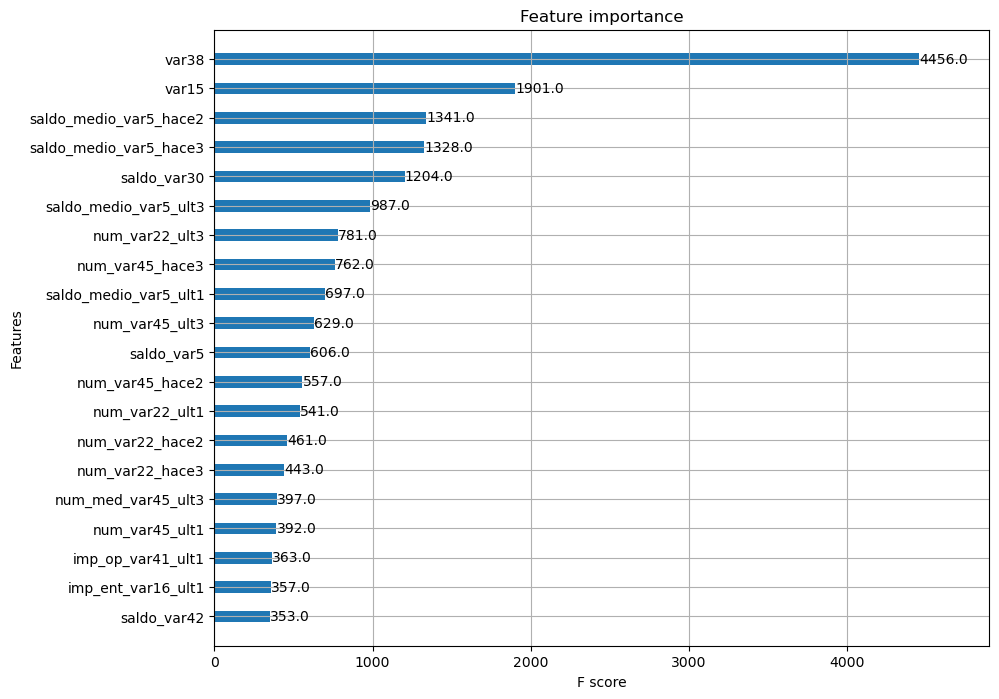

In [60]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf,ax=ax, max_num_features=20,height=0.4)

In [61]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric = "auc", eval_set=evals,
            verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
[16]	valid_0's auc: 0.840337	valid_0's binary_loglo

In [62]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64],
         'max_depth':[128,160],
         'min_child_samples':[60,100],
         'subsample':[0.8,1]}
# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
          eval_set = [(X_train,y_train),(X_test,y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

[31]	valid_0's auc: 0.874768	valid_0's binary_logloss: 0.123745	valid_1's auc: 0.839314	valid_1's binary_logloss: 0.139314
[32]	valid_0's auc: 0.875593	valid_0's binary_logloss: 0.123486	valid_1's auc: 0.838875	valid_1's binary_logloss: 0.139322
[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc: 0.87774	valid_0's binary_logloss: 0.122892	valid_1's auc: 0.838376	valid_1's binary_logloss: 0.139342
[35]	valid_0's auc: 0.878372	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.838454	valid_1's binary_logloss: 0.13931
[36]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.122414	valid_1's auc: 0.838895	valid_1's binary_logloss: 0.13925
[37]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.122216	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.139302
[38]	valid_0's auc: 0.880036	valid_0's binary_logloss: 0.121998	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139306
[39]	valid_0's auc: 0

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.146491
[9]	valid_0's auc: 0.849282	

[17]	valid_0's auc: 0.876061	valid_0's binary_logloss: 0.124928	valid_1's auc: 0.831586	valid_1's binary_logloss: 0.142141
[18]	valid_0's auc: 0.876982	valid_0's binary_logloss: 0.124313	valid_1's auc: 0.830954	valid_1's binary_logloss: 0.142066
[19]	valid_0's auc: 0.877885	valid_0's binary_logloss: 0.123709	valid_1's auc: 0.830572	valid_1's binary_logloss: 0.14196
[20]	valid_0's auc: 0.879378	valid_0's binary_logloss: 0.123088	valid_1's auc: 0.830076	valid_1's binary_logloss: 0.14196
[21]	valid_0's auc: 0.880647	valid_0's binary_logloss: 0.122488	valid_1's auc: 0.830109	valid_1's binary_logloss: 0.141858
[22]	valid_0's auc: 0.881614	valid_0's binary_logloss: 0.121973	valid_1's auc: 0.829735	valid_1's binary_logloss: 0.141822
[23]	valid_0's auc: 0.882402	valid_0's binary_logloss: 0.121554	valid_1's auc: 0.829254	valid_1's binary_logloss: 0.141805
[24]	valid_0's auc: 0.883011	valid_0's binary_logloss: 0.121078	valid_1's auc: 0.829054	valid_1's binary_logloss: 0.14178
[25]	valid_0's auc:

[17]	valid_0's auc: 0.876854	valid_0's binary_logloss: 0.124918	valid_1's auc: 0.835689	valid_1's binary_logloss: 0.141524
[18]	valid_0's auc: 0.878211	valid_0's binary_logloss: 0.124197	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.141285
[19]	valid_0's auc: 0.879125	valid_0's binary_logloss: 0.123553	valid_1's auc: 0.835877	valid_1's binary_logloss: 0.141128
[20]	valid_0's auc: 0.880489	valid_0's binary_logloss: 0.122856	valid_1's auc: 0.835385	valid_1's binary_logloss: 0.141032
[21]	valid_0's auc: 0.881696	valid_0's binary_logloss: 0.122219	valid_1's auc: 0.835822	valid_1's binary_logloss: 0.140843
[22]	valid_0's auc: 0.882257	valid_0's binary_logloss: 0.121726	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140761
[23]	valid_0's auc: 0.883635	valid_0's binary_logloss: 0.121206	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.140607
[24]	valid_0's auc: 0.884533	valid_0's binary_logloss: 0.120734	valid_1's auc: 0.836473	valid_1's binary_logloss: 0.14049
[25]	valid_0's au

[35]	valid_0's auc: 0.892825	valid_0's binary_logloss: 0.116751	valid_1's auc: 0.826865	valid_1's binary_logloss: 0.142116
[36]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116353	valid_1's auc: 0.827203	valid_1's binary_logloss: 0.14207
[37]	valid_0's auc: 0.89456	valid_0's binary_logloss: 0.11603	valid_1's auc: 0.827292	valid_1's binary_logloss: 0.142005
[38]	valid_0's auc: 0.89511	valid_0's binary_logloss: 0.115713	valid_1's auc: 0.827214	valid_1's binary_logloss: 0.14206
[39]	valid_0's auc: 0.895738	valid_0's binary_logloss: 0.115415	valid_1's auc: 0.82695	valid_1's binary_logloss: 0.142162
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301

[23]	valid_0's auc: 0.883635	valid_0's binary_logloss: 0.121206	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.140607
[24]	valid_0's auc: 0.884533	valid_0's binary_logloss: 0.120734	valid_1's auc: 0.836473	valid_1's binary_logloss: 0.14049
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.140403
[26]	valid_0's auc: 0.886292	valid_0's binary_logloss: 0.119794	valid_1's auc: 0.836549	valid_1's binary_logloss: 0.140423
[27]	valid_0's auc: 0.887064	valid_0's binary_logloss: 0.119366	valid_1's auc: 0.836155	valid_1's binary_logloss: 0.140447
[28]	valid_0's auc: 0.887621	valid_0's binary_logloss: 0.119008	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.140532
[29]	valid_0's auc: 0.888965	valid_0's binary_logloss: 0.118547	valid_1's auc: 0.835464	valid_1's binary_logloss: 0.140508
[30]	valid_0's auc: 0.889898	valid_0's binary_logloss: 0.118139	valid_1's auc: 0.83577	valid_1's binary_logloss: 0.140461
[31]	valid_0's auc

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

[32]	valid_0's auc: 0.87282	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.838675	valid_1's binary_logloss: 0.139761
[33]	valid_0's auc: 0.874106	valid_0's binary_logloss: 0.124412	valid_1's auc: 0.838893	valid_1's binary_logloss: 0.139687
[34]	valid_0's auc: 0.874887	valid_0's binary_logloss: 0.124169	valid_1's auc: 0.838801	valid_1's binary_logloss: 0.139672
[35]	valid_0's auc: 0.875447	valid_0's binary_logloss: 0.123934	valid_1's auc: 0.838835	valid_1's binary_logloss: 0.139667
[36]	valid_0's auc: 0.87617	valid_0's binary_logloss: 0.123693	valid_1's auc: 0.838505	valid_1's binary_logloss: 0.139699
[37]	valid_0's auc: 0.876793	valid_0's binary_logloss: 0.12346	valid_1's auc: 0.838104	valid_1's binary_logloss: 0.139783
[38]	valid_0's auc: 0.877265	valid_0's binary_logloss: 0.123251	valid_1's auc: 0.838267	valid_1's binary_logloss: 0.139787
[39]	valid_0's auc: 0.877869	valid_0's binary_logloss: 0.123018	valid_1's auc: 0.838004	valid_1's binary_logloss: 0.139806
[40]	valid_0's auc:

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

[54]	valid_0's auc: 0.884106	valid_0's binary_logloss: 0.120208	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139886
[55]	valid_0's auc: 0.884777	valid_0's binary_logloss: 0.120039	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139902
[56]	valid_0's auc: 0.88511	valid_0's binary_logloss: 0.11989	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.139926
[57]	valid_0's auc: 0.885365	valid_0's binary_logloss: 0.11975	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139934
[58]	valid_0's auc: 0.885606	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139938
[59]	valid_0's auc: 0.885965	valid_0's binary_logloss: 0.119403	valid_1's auc: 0.837558	valid_1's binary_logloss: 0.140007
[60]	valid_0's auc: 0.886208	valid_0's binary_logloss: 0.119263	valid_1's auc: 0.83744	valid_1's binary_logloss: 0.140079
[61]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.119118	valid_1's auc: 0.837349	valid_1's binary_logloss: 0.140059
[1]	valid_0's auc: 0

[37]	valid_0's auc: 0.894774	valid_0's binary_logloss: 0.116913	valid_1's auc: 0.836601	valid_1's binary_logloss: 0.139569
[38]	valid_0's auc: 0.895494	valid_0's binary_logloss: 0.116611	valid_1's auc: 0.836232	valid_1's binary_logloss: 0.139645
[39]	valid_0's auc: 0.896102	valid_0's binary_logloss: 0.116275	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.139653
[40]	valid_0's auc: 0.896715	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.139671
[41]	valid_0's auc: 0.897232	valid_0's binary_logloss: 0.115612	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139762
[42]	valid_0's auc: 0.897875	valid_0's binary_logloss: 0.11528	valid_1's auc: 0.836151	valid_1's binary_logloss: 0.139777
[43]	valid_0's auc: 0.898493	valid_0's binary_logloss: 0.114999	valid_1's auc: 0.836216	valid_1's binary_logloss: 0.139761
[44]	valid_0's auc: 0.899179	valid_0's binary_logloss: 0.114703	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139755
[1]	valid_0's auc

[18]	valid_0's auc: 0.874047	valid_0's binary_logloss: 0.125646	valid_1's auc: 0.831917	valid_1's binary_logloss: 0.141748
[19]	valid_0's auc: 0.875336	valid_0's binary_logloss: 0.125072	valid_1's auc: 0.831274	valid_1's binary_logloss: 0.141658
[20]	valid_0's auc: 0.876959	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.831275	valid_1's binary_logloss: 0.141511
[21]	valid_0's auc: 0.878049	valid_0's binary_logloss: 0.123928	valid_1's auc: 0.830813	valid_1's binary_logloss: 0.141459
[22]	valid_0's auc: 0.878905	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.141449
[23]	valid_0's auc: 0.879827	valid_0's binary_logloss: 0.12295	valid_1's auc: 0.829554	valid_1's binary_logloss: 0.141492
[24]	valid_0's auc: 0.880692	valid_0's binary_logloss: 0.122479	valid_1's auc: 0.829256	valid_1's binary_logloss: 0.141487
[25]	valid_0's auc: 0.881715	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.829326	valid_1's binary_logloss: 0.141362
[26]	valid_0's auc

[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024

[20]	valid_0's auc: 0.864799	valid_0's binary_logloss: 0.127654	valid_1's auc: 0.83435	valid_1's binary_logloss: 0.141148
[21]	valid_0's auc: 0.866472	valid_0's binary_logloss: 0.127165	valid_1's auc: 0.834176	valid_1's binary_logloss: 0.141041
[22]	valid_0's auc: 0.867055	valid_0's binary_logloss: 0.126777	valid_1's auc: 0.834173	valid_1's binary_logloss: 0.140887
[23]	valid_0's auc: 0.867726	valid_0's binary_logloss: 0.12643	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.140909
[24]	valid_0's auc: 0.868612	valid_0's binary_logloss: 0.126061	valid_1's auc: 0.833336	valid_1's binary_logloss: 0.140824
[25]	valid_0's auc: 0.869224	valid_0's binary_logloss: 0.125753	valid_1's auc: 0.833428	valid_1's binary_logloss: 0.140793
[26]	valid_0's auc: 0.870183	valid_0's binary_logloss: 0.125414	valid_1's auc: 0.83333	valid_1's binary_logloss: 0.140724
[27]	valid_0's auc: 0.870926	valid_0's binary_logloss: 0.125123	valid_1's auc: 0.832503	valid_1's binary_logloss: 0.140772
[28]	valid_0's auc:

[23]	valid_0's auc: 0.867894	valid_0's binary_logloss: 0.126519	valid_1's auc: 0.839641	valid_1's binary_logloss: 0.139745
[24]	valid_0's auc: 0.868501	valid_0's binary_logloss: 0.126192	valid_1's auc: 0.840025	valid_1's binary_logloss: 0.139593
[25]	valid_0's auc: 0.869311	valid_0's binary_logloss: 0.125838	valid_1's auc: 0.839961	valid_1's binary_logloss: 0.139531
[26]	valid_0's auc: 0.870325	valid_0's binary_logloss: 0.125518	valid_1's auc: 0.839261	valid_1's binary_logloss: 0.139524
[27]	valid_0's auc: 0.871488	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.139365
[28]	valid_0's auc: 0.87235	valid_0's binary_logloss: 0.12484	valid_1's auc: 0.840114	valid_1's binary_logloss: 0.139236
[29]	valid_0's auc: 0.872991	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839491	valid_1's binary_logloss: 0.139271
[30]	valid_0's auc: 0.874129	valid_0's binary_logloss: 0.124312	valid_1's auc: 0.839589	valid_1's binary_logloss: 0.13918
[31]	valid_0's auc:

[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.146417
[9]	valid_0's auc: 0.851646

[47]	valid_0's auc: 0.8853	valid_0's binary_logloss: 0.120089	valid_1's auc: 0.838624	valid_1's binary_logloss: 0.139193
[48]	valid_0's auc: 0.885876	valid_0's binary_logloss: 0.11993	valid_1's auc: 0.838569	valid_1's binary_logloss: 0.139212
[49]	valid_0's auc: 0.886141	valid_0's binary_logloss: 0.119757	valid_1's auc: 0.838345	valid_1's binary_logloss: 0.139288
[50]	valid_0's auc: 0.886433	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.139332
[51]	valid_0's auc: 0.886975	valid_0's binary_logloss: 0.119377	valid_1's auc: 0.838335	valid_1's binary_logloss: 0.139331
[52]	valid_0's auc: 0.887568	valid_0's binary_logloss: 0.119161	valid_1's auc: 0.838204	valid_1's binary_logloss: 0.139331
[53]	valid_0's auc: 0.887867	valid_0's binary_logloss: 0.118974	valid_1's auc: 0.838044	valid_1's binary_logloss: 0.13936
[54]	valid_0's auc: 0.888093	valid_0's binary_logloss: 0.118834	valid_1's auc: 0.838137	valid_1's binary_logloss: 0.13935
[55]	valid_0's auc: 0

[19]	valid_0's auc: 0.88046	valid_0's binary_logloss: 0.123313	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.140738
[20]	valid_0's auc: 0.881517	valid_0's binary_logloss: 0.12269	valid_1's auc: 0.8347	valid_1's binary_logloss: 0.140611
[21]	valid_0's auc: 0.882464	valid_0's binary_logloss: 0.122095	valid_1's auc: 0.834656	valid_1's binary_logloss: 0.140487
[22]	valid_0's auc: 0.883744	valid_0's binary_logloss: 0.121504	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.140328
[23]	valid_0's auc: 0.885301	valid_0's binary_logloss: 0.12091	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.140199
[24]	valid_0's auc: 0.886266	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.140094
[25]	valid_0's auc: 0.88755	valid_0's binary_logloss: 0.119931	valid_1's auc: 0.836199	valid_1's binary_logloss: 0.140076
[26]	valid_0's auc: 0.888525	valid_0's binary_logloss: 0.119473	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.139945
[27]	valid_0's auc: 0.

[54]	valid_0's auc: 0.905166	valid_0's binary_logloss: 0.110627	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.141282
[55]	valid_0's auc: 0.905665	valid_0's binary_logloss: 0.110375	valid_1's auc: 0.833739	valid_1's binary_logloss: 0.141413
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	v

[34]	valid_0's auc: 0.895313	valid_0's binary_logloss: 0.116321	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.139826
[35]	valid_0's auc: 0.895876	valid_0's binary_logloss: 0.116039	valid_1's auc: 0.836245	valid_1's binary_logloss: 0.139883
[36]	valid_0's auc: 0.896909	valid_0's binary_logloss: 0.115684	valid_1's auc: 0.836079	valid_1's binary_logloss: 0.139912
[37]	valid_0's auc: 0.897427	valid_0's binary_logloss: 0.115388	valid_1's auc: 0.835564	valid_1's binary_logloss: 0.140024
[38]	valid_0's auc: 0.898442	valid_0's binary_logloss: 0.115006	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.140075
[39]	valid_0's auc: 0.899304	valid_0's binary_logloss: 0.114592	valid_1's auc: 0.836273	valid_1's binary_logloss: 0.139974
[40]	valid_0's auc: 0.89974	valid_0's binary_logloss: 0.11432	valid_1's auc: 0.836096	valid_1's binary_logloss: 0.140042
[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
[2]	valid_0's auc: 

[25]	valid_0's auc: 0.867496	valid_0's binary_logloss: 0.126629	valid_1's auc: 0.834195	valid_1's binary_logloss: 0.140539
[26]	valid_0's auc: 0.867923	valid_0's binary_logloss: 0.126353	valid_1's auc: 0.834028	valid_1's binary_logloss: 0.140506
[27]	valid_0's auc: 0.868685	valid_0's binary_logloss: 0.126058	valid_1's auc: 0.834718	valid_1's binary_logloss: 0.140359
[28]	valid_0's auc: 0.869304	valid_0's binary_logloss: 0.125764	valid_1's auc: 0.834935	valid_1's binary_logloss: 0.140287
[29]	valid_0's auc: 0.870037	valid_0's binary_logloss: 0.125514	valid_1's auc: 0.834481	valid_1's binary_logloss: 0.140258
[30]	valid_0's auc: 0.870785	valid_0's binary_logloss: 0.125254	valid_1's auc: 0.834179	valid_1's binary_logloss: 0.140275
[31]	valid_0's auc: 0.871706	valid_0's binary_logloss: 0.124992	valid_1's auc: 0.834475	valid_1's binary_logloss: 0.140205
[32]	valid_0's auc: 0.872582	valid_0's binary_logloss: 0.124728	valid_1's auc: 0.834353	valid_1's binary_logloss: 0.140189
[33]	valid_0's a

[26]	valid_0's auc: 0.868559	valid_0's binary_logloss: 0.126248	valid_1's auc: 0.837903	valid_1's binary_logloss: 0.140092
[27]	valid_0's auc: 0.869394	valid_0's binary_logloss: 0.125936	valid_1's auc: 0.837493	valid_1's binary_logloss: 0.14006
[28]	valid_0's auc: 0.87048	valid_0's binary_logloss: 0.125677	valid_1's auc: 0.837623	valid_1's binary_logloss: 0.140007
[29]	valid_0's auc: 0.87105	valid_0's binary_logloss: 0.125405	valid_1's auc: 0.838216	valid_1's binary_logloss: 0.13986
[30]	valid_0's auc: 0.871749	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.838898	valid_1's binary_logloss: 0.139742
[31]	valid_0's auc: 0.87247	valid_0's binary_logloss: 0.124907	valid_1's auc: 0.838959	valid_1's binary_logloss: 0.139727
[32]	valid_0's auc: 0.87282	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.838675	valid_1's binary_logloss: 0.139761
[33]	valid_0's auc: 0.874106	valid_0's binary_logloss: 0.124412	valid_1's auc: 0.838893	valid_1's binary_logloss: 0.139687
[34]	valid_0's auc: 0.

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

[51]	valid_0's auc: 0.883154	valid_0's binary_logloss: 0.120688	valid_1's auc: 0.838222	valid_1's binary_logloss: 0.139803
[52]	valid_0's auc: 0.883348	valid_0's binary_logloss: 0.120567	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.139824
[53]	valid_0's auc: 0.883583	valid_0's binary_logloss: 0.120424	valid_1's auc: 0.83788	valid_1's binary_logloss: 0.139844
[54]	valid_0's auc: 0.884106	valid_0's binary_logloss: 0.120208	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139886
[55]	valid_0's auc: 0.884777	valid_0's binary_logloss: 0.120039	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139902
[56]	valid_0's auc: 0.88511	valid_0's binary_logloss: 0.11989	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.139926
[57]	valid_0's auc: 0.885365	valid_0's binary_logloss: 0.11975	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139934
[58]	valid_0's auc: 0.885606	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139938
[59]	valid_0's auc: 

[22]	valid_0's auc: 0.880423	valid_0's binary_logloss: 0.123029	valid_1's auc: 0.836817	valid_1's binary_logloss: 0.139912
[23]	valid_0's auc: 0.881684	valid_0's binary_logloss: 0.122492	valid_1's auc: 0.836983	valid_1's binary_logloss: 0.139762
[24]	valid_0's auc: 0.882873	valid_0's binary_logloss: 0.121986	valid_1's auc: 0.837319	valid_1's binary_logloss: 0.139659
[25]	valid_0's auc: 0.883597	valid_0's binary_logloss: 0.121566	valid_1's auc: 0.837154	valid_1's binary_logloss: 0.139623
[26]	valid_0's auc: 0.884814	valid_0's binary_logloss: 0.121104	valid_1's auc: 0.836302	valid_1's binary_logloss: 0.139668
[27]	valid_0's auc: 0.886026	valid_0's binary_logloss: 0.120635	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.139601
[28]	valid_0's auc: 0.887071	valid_0's binary_logloss: 0.120222	valid_1's auc: 0.836646	valid_1's binary_logloss: 0.139557
[29]	valid_0's auc: 0.887946	valid_0's binary_logloss: 0.119804	valid_1's auc: 0.836735	valid_1's binary_logloss: 0.139518
[30]	valid_0's a

[47]	valid_0's auc: 0.898562	valid_0's binary_logloss: 0.114262	valid_1's auc: 0.835926	valid_1's binary_logloss: 0.140642
[48]	valid_0's auc: 0.898919	valid_0's binary_logloss: 0.114006	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140687
[49]	valid_0's auc: 0.899111	valid_0's binary_logloss: 0.113791	valid_1's auc: 0.835874	valid_1's binary_logloss: 0.140728
[50]	valid_0's auc: 0.89987	valid_0's binary_logloss: 0.113543	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.14075
[51]	valid_0's auc: 0.90004	valid_0's binary_logloss: 0.113342	valid_1's auc: 0.835947	valid_1's binary_logloss: 0.140748
[52]	valid_0's auc: 0.900405	valid_0's binary_logloss: 0.113087	valid_1's auc: 0.836011	valid_1's binary_logloss: 0.140767
[53]	valid_0's auc: 0.900828	valid_0's binary_logloss: 0.112831	valid_1's auc: 0.836259	valid_1's binary_logloss: 0.140771
[54]	valid_0's auc: 0.901597	valid_0's binary_logloss: 0.112604	valid_1's auc: 0.836296	valid_1's binary_logloss: 0.14078
[55]	valid_0's auc: 

[32]	valid_0's auc: 0.890876	valid_0's binary_logloss: 0.118631	valid_1's auc: 0.836346	valid_1's binary_logloss: 0.139532
[33]	valid_0's auc: 0.891629	valid_0's binary_logloss: 0.118259	valid_1's auc: 0.836206	valid_1's binary_logloss: 0.139603
[34]	valid_0's auc: 0.892446	valid_0's binary_logloss: 0.117893	valid_1's auc: 0.836005	valid_1's binary_logloss: 0.139603
[35]	valid_0's auc: 0.893407	valid_0's binary_logloss: 0.11752	valid_1's auc: 0.8361	valid_1's binary_logloss: 0.139574
[36]	valid_0's auc: 0.893836	valid_0's binary_logloss: 0.117247	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.139608
[37]	valid_0's auc: 0.894774	valid_0's binary_logloss: 0.116913	valid_1's auc: 0.836601	valid_1's binary_logloss: 0.139569
[38]	valid_0's auc: 0.895494	valid_0's binary_logloss: 0.116611	valid_1's auc: 0.836232	valid_1's binary_logloss: 0.139645
[39]	valid_0's auc: 0.896102	valid_0's binary_logloss: 0.116275	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.139653
[40]	valid_0's auc:

[1]	training's auc: 0.824305	training's binary_logloss: 0.156217	valid_1's auc: 0.819488	valid_1's binary_logloss: 0.165016
[2]	training's auc: 0.828798	training's binary_logloss: 0.150959	valid_1's auc: 0.822075	valid_1's binary_logloss: 0.159734
[3]	training's auc: 0.839609	training's binary_logloss: 0.147147	valid_1's auc: 0.829436	valid_1's binary_logloss: 0.156119
[4]	training's auc: 0.845158	training's binary_logloss: 0.144107	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.153073
[5]	training's auc: 0.847711	training's binary_logloss: 0.14162	valid_1's auc: 0.839041	valid_1's binary_logloss: 0.150773
[6]	training's auc: 0.849184	training's binary_logloss: 0.139622	valid_1's auc: 0.839076	valid_1's binary_logloss: 0.148948
[7]	training's auc: 0.85094	training's binary_logloss: 0.13786	valid_1's auc: 0.839943	valid_1's binary_logloss: 0.147346
[8]	training's auc: 0.853386	training's binary_logloss: 0.136418	valid_1's auc: 0.84098	valid_1's binary_logloss: 0.146068
[9]	training

In [63]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32,subsample=0.8, min_child_samples=100,
                          max_depth=128)
evals= [(X_test,y_test)]
lgbm_clf.fit(X_train, y_train,early_stopping_rounds=100,eval_metric="auc",eval_set=evals,
            verbose=True)
lgbm_roc_score =roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.141254
[16]	valid_0's auc: 0.841108	valid_0's binary_logloss: 0

## 분류 실습 - 캐글 신용카드 사기 검출

***언더 샘플링과 오버 샘플링의 이해***
 - 언더 샘플링 : 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식이다.
 - 과도하게 정상 레이블로 학습/예측하는 부작용을 개선할 수 있지만, 너무 많은 정상 레이블 데이터를 감소시키기 때문에 수행하기 어렵다.

 
 - 오버 샘플링 : 이상 데이터와 같이 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법이다.
 - SMOTE는 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃을 찾아서 이웃들의 차이를 일정 값으로 만들어 새로운 데이터를 생성

In [65]:
# conda install -c conda-forge imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [66]:
from sklearn.model_selection import train_test_split

#인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

In [67]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 칼럼이 레이블 , 나머지는 피처들
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    # train_test_split( )으로 학습과 테스트 데이터 분할, stratify = y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features,y_target, test_size=0.3,random_state = 0,stratify = y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [68]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [69]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

# 3장에서 사용한 get_clf_eval() 함수를 이용해 평가 수행.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC - AUC 추가
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC :{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85283    12]
 [   64    84]]
정확도 : 0.9991, 정밀도 : 0.8750, 재현율: 0.5676, F1:0.6885, AUC :0.9566


In [70]:
#인자로 사이킷런의 Estimator객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None,tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba)

In [71]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

오차행렬
[[85290     5]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9573, 재현율: 0.7568, F1:0.8453, AUC :0.9790


<Axes: xlabel='Amount', ylabel='Density'>

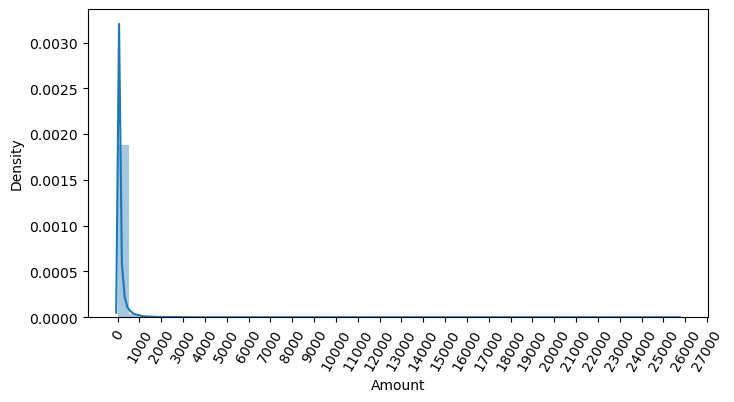

In [72]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000),rotation=60)
sns.distplot(card_df['Amount'])

In [73]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변화하는 로직으로 수정,
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 칼럼으로 입력
    df_copy.insert(0,'Amount_Scaled',amount_n)
    # 기존 Time,Amount 피처 삭제
    df_copy.drop(['Time','Amount'],axis=1, inplace=True)
    return df_copy

In [74]:
#Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train,X_test, y_train, y_test= get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test = X_test, tgt_train=y_train,tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   58    90]]
정확도 : 0.9992, 정밀도 : 0.8654, 재현율: 0.6081, F1:0.7143, AUC :0.9702
### LightGBM 예측 성능 ###
오차행렬
[[85150   145]
 [  125    23]]
정확도 : 0.9968, 정밀도 : 0.1369, 재현율: 0.1554, F1:0.1456, AUC :0.5768


In [75]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    #넘파이의 log1p()를 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    return df_copy

In [76]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf,ftr_train=X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf,ftr_train=X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85283    12]
 [   59    89]]
정확도 : 0.9992, 정밀도 : 0.8812, 재현율: 0.6014, F1:0.7149, AUC :0.9727
### LightGBM 예측 성능 ###
오차행렬
[[85217    78]
 [   78    70]]
정확도 : 0.9982, 정밀도 : 0.4730, 재현율: 0.4730, F1:0.4730, AUC :0.7393


<Axes: >

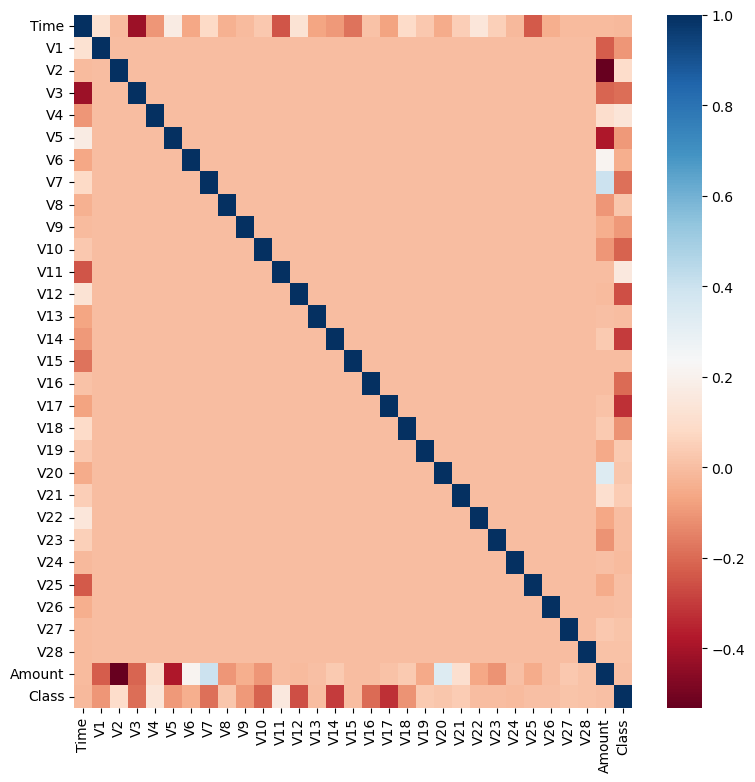

In [77]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr= card_df.corr()
sns.heatmap(corr,cmap='RdBu')

In [78]:
import numpy as np
def get_outlier(df=None, column = None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출. 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values,25)
    quantile_75 = np.percentile(fraud.values,75)
    # IQR을 구하고 IQR에 1.5를 곱해 최대값과 최소값 지점 구함.
    iqr = quantile_75-quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 -iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환.
    outlier_index = fraud[(fraud<lowest_val) | (fraud>highest_val)].index
    return outlier_index

In [79]:
outlier_index = get_outlier(df = card_df, column='V14',weight=1.5)
print('이상치 데이터 인덱스:',outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [80]:
#get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    # 이상치 데이터 삭제하는 로직 추가.
    outlier_index = get_outlier(df=df_copy, column = 'V14',weight=1.5)
    df_copy.drop(outlier_index, axis =0, inplace=True)
    return df_copy

X_train,X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf,ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)
print('### LightGBm 예측 성능 ###')
get_model_train_eval(lgbm_clf,ftr_train =X_train, ftr_test = X_test, tgt_train = y_train, tgt_test =y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   48    98]]
정확도 : 0.9993, 정밀도 : 0.8750, 재현율: 0.6712, F1:0.7597, AUC :0.9743
### LightGBm 예측 성능 ###
오차행렬
[[85268    27]
 [   36   110]]
정확도 : 0.9993, 정밀도 : 0.8029, 재현율: 0.7534, F1:0.7774, AUC :0.9219


 ### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:',X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:',X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n',pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포:
 0    199020
1    199020
Name: Class, dtype: int64


In [82]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train = X_train_over, ftr_test= X_test, tgt_train=y_train_over,tgt_test=y_test)

오차행렬
[[82937  2358]
 [   11   135]]
정확도 : 0.9723, 정밀도 : 0.0542, 재현율: 0.9247, F1:0.1023, AUC :0.9737


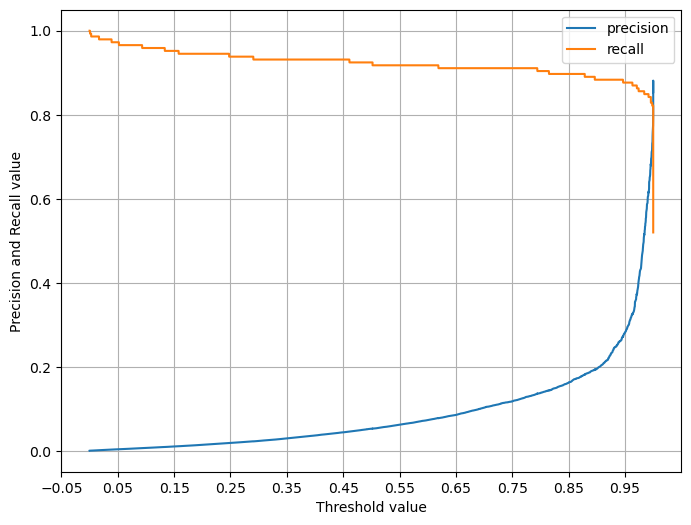

In [83]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '-',label ='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [84]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf,ftr_train = X_train_over, ftr_test=X_test,
                    tgt_train=y_train_over, tgt_test=y_test)

오차행렬
[[85283    12]
 [   22   124]]
정확도 : 0.9996, 정밀도 : 0.9118, 재현율: 0.8493, F1:0.8794, AUC :0.9814


## 스태킹 앙상블
#### 스태킹은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 앞에서 소개한 배깅 및 부스팅과 공통점을 가지고 있다.
#### 가장 큰 차이점은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다.
#### 두 종류의 모델이 필요한데, 첫 번째는 개별적인 기반 모델이고, 두 번째는 최종 메타 모델
#### 현실 모델에 적용하는 경우는 많지 않고, 캐글 같은 대회에서 높은 순위 차지할 때 사용.

In [85]:
# 기본 스태킹 모델
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data,y_label, test_size = 0.2,random_state = 0)

In [86]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)
# 개별 모델들을 학습.
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [87]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정,
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test,knn_pred)))
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))
print('결정 트리 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))
print('에이다부스트 정확도:{0:.4f}'.format(accuracy_score(y_test,ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도:0.9649
결정 트리 정확도:0.9123
에이다부스트 정확도:0.9561


In [88]:
pred = np.array([knn_pred,rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [89]:
lr_final.fit(pred,y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도:{0:.4f}'.format(accuracy_score(y_test,final)))

최종 메타 모델의 예측 정확도:0.9737


**CV 세트 기반의 스태킹**
 - 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용
 - 먼저, 학습용 데이터를 N개의 폴드로 나눈다. (3개 가정) 3번 반복 작업, 3번째 반복에서 개별 모델의 예측값으로 학습/검증 데이터 분리
 - 1. 2개는 학습용 데이터, 1개는 검증용 데이터로 나눈다.
 - 2. 검증 폴드 1개 데이터로 예측하고 그 결과를 저장.
 - 3. 2개의 학습 폴드 데이터로 학습된 개별 모델은 원본 테스트 데이터를 예측하여 예측값을 생성. 3번 반복

In [91]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits = n_folds, shuffle=True)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__,' model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ',folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index,:] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:,folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean        

In [92]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [93]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train),axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test),axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape :', Stack_final_X_train.shape,
     '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape : (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [94]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도:{0:.4f}'.format(accuracy_score(y_test,stack_final)))

최종 메타 모델의 예측 정확도:0.9825
